# NoteBook illustrativo, codice uguale a 2.PathPlanningVoroni.py
 

# Import librerie

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import networkx as nx

# Generazione punti casuali (ostacoli) e Punti di partenza e destinazione

In [10]:
# Genera punti casuali come siti di Voronoi
np.random.seed(np.random.randint(0, 1000))
points = np.random.rand(20, 2)
# Aggiungi i punti di partenza e arrivo (start e end)
start = np.array([0.2, 0.2])
end = np.array([0.8, 0.8])

# rimozioni punti troppo vicini ai punti di partenza e destinazione (non possono esserci ostacoli proprio dentro questi due punti)

In [11]:
# Calcola le distanze tra i punti casuali e i punti di partenza e arrivo
distances_start = np.linalg.norm(points - start, axis=1)
distances_end = np.linalg.norm(points - end, axis=1)

# Scegli una soglia per la distanza minima dai punti di partenza e arrivo
threshold = 0.1

# Filtra i punti troppo vicini ai punti di partenza e arrivo
filtered_points = points[(distances_start > threshold) & (distances_end > threshold)]
removed_points = points[~((distances_start > threshold) & (distances_end > threshold))]

Punti rimossi:
Punto 1: [0.87670148 0.77293707]
Punto 2: [0.84445244 0.72612476]
Punto 3: [0.88520905 0.80569033]


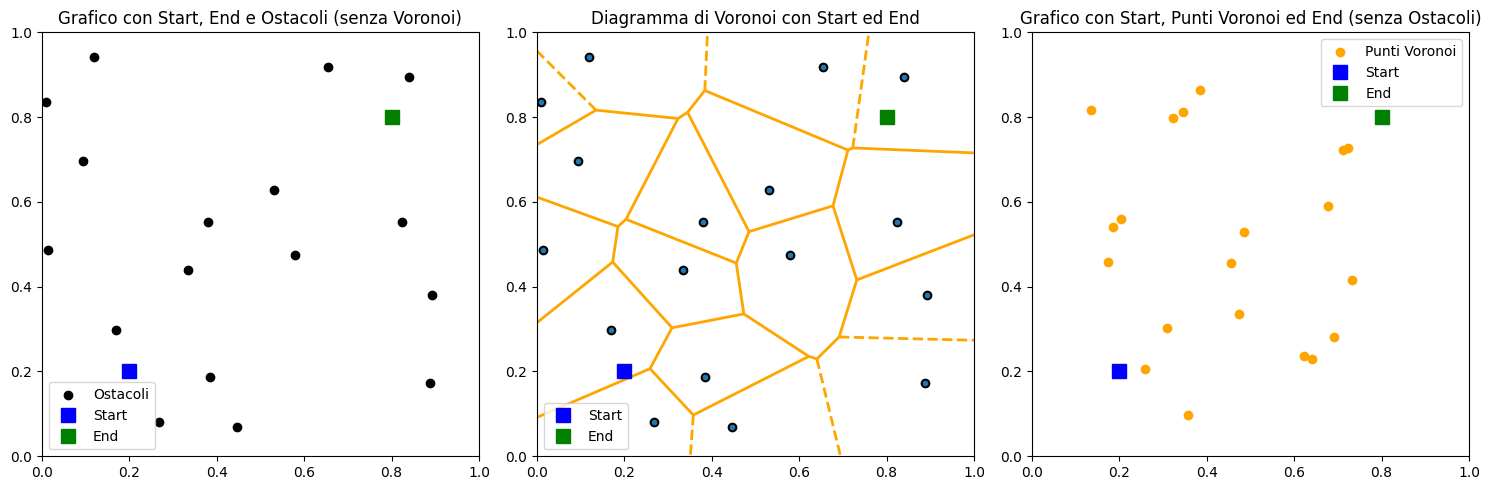

In [12]:
# Creazione della figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Primo grafico: Start, End e Ostacoli (senza Voronoi)
ax1 = axes[0]
ax1.scatter(filtered_points[:, 0], filtered_points[:, 1], c='k', marker='o', label='Ostacoli')
ax1.plot(start[0], start[1], 'bs', markersize=10, label='Start')
ax1.plot(end[0], end[1], 'gs', markersize=10, label='End')
ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_title("Grafico con Start, End e Ostacoli (senza Voronoi)")

# Calcola il diagramma di Voronoi con i punti filtrati
vor = Voronoi(filtered_points)

# Secondo grafico: Diagramma di Voronoi con Start e End
ax2 = axes[1]
ax2.plot(filtered_points[:, 0], filtered_points[:, 1], 'ko')
voronoi_plot_2d(vor, ax=ax2, show_vertices=False, line_colors='orange', line_width=2)
ax2.plot(start[0], start[1], 'bs', markersize=10, label='Start')
ax2.plot(end[0], end[1], 'gs', markersize=10, label='End')
ax2.legend()
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_title("Diagramma di Voronoi con Start ed End")

# Terzo grafico: Start, Punti Voronoi ed End (senza Ostacoli)
ax3 = axes[2]
ax3.scatter(vor.vertices[:, 0], vor.vertices[:, 1], c='orange', marker='o', label='Punti Voronoi')
ax3.plot(start[0], start[1], 'bs', markersize=10, label='Start')
ax3.plot(end[0], end[1], 'gs', markersize=10, label='End')
ax3.legend()
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.set_title("Grafico con Start, Punti Voronoi ed End (senza Ostacoli)")

# Stampa i punti rimossi
print("Punti rimossi:")
if len(removed_points) == 0:
  print("non sono stati rimossi punti")
else:
  for i, point in enumerate(removed_points):
      print(f"Punto {i+1}: {point}")

plt.tight_layout()
plt.show()

# Creazione del grafo

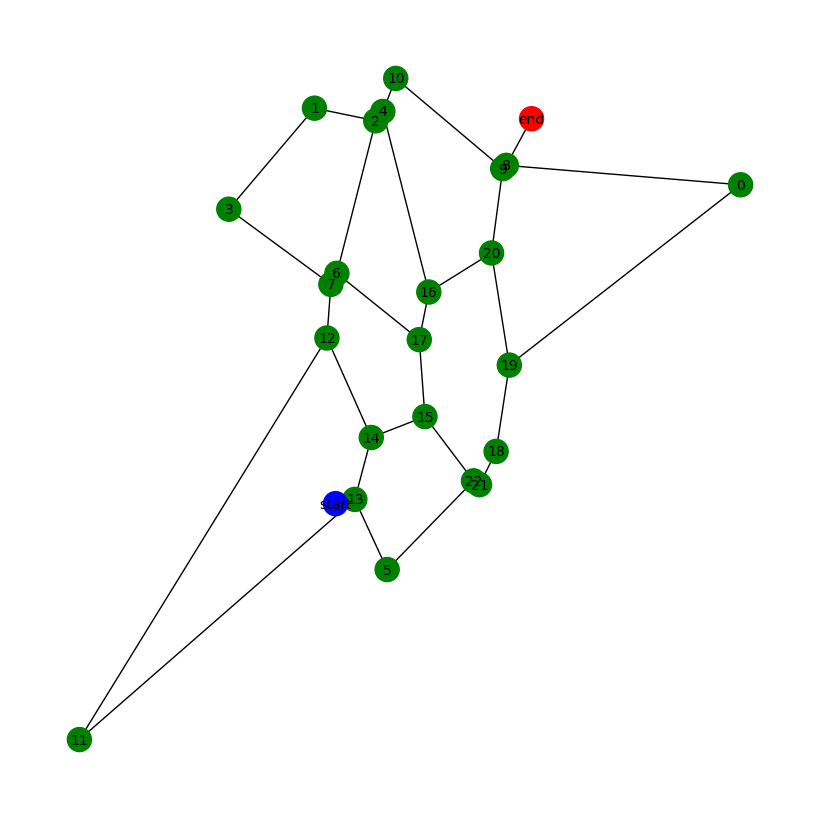

In [13]:
# Crea un grafo vuoto con NetworkX
G = nx.Graph()

# Aggiungi i vertici del diagramma di Voronoi come nodi al grafo
for i, vertex in enumerate(vor.vertices):
    G.add_node(i, pos=vertex)

# Aggiungi gli archi tra i nodi vicini nel diagramma di Voronoi come archi pesati
for ridge in vor.ridge_vertices:
    if -1 not in ridge:
        distance = np.linalg.norm(vor.vertices[ridge[0]] - vor.vertices[ridge[1]])
        G.add_edge(ridge[0], ridge[1], weight=distance)

# Aggiungi i punti di partenza e arrivo come nodi al grafo
G.add_node('start', pos=tuple(start))
G.add_node('end', pos=tuple(end))

# Collega i punti di partenza e arrivo ai vertici più vicini nel diagramma di Voronoi
start_index = np.argmin(np.linalg.norm(vor.vertices - start, axis=1))
end_index = np.argmin(np.linalg.norm(vor.vertices - end, axis=1))

G.add_edge('start', start_index, weight=np.linalg.norm(start - vor.vertices[start_index]))
G.add_edge('end', end_index, weight=np.linalg.norm(end - vor.vertices[end_index]))

# Disegna il grafo
pos = nx.get_node_attributes(G, 'pos')
labels = {node: node if node not in ['start', 'end'] else None for node in G.nodes()}
node_colors = ['b' if node == 'start' else ('r' if node == 'end' else 'g') for node in G.nodes()]

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=labels, node_size=300, node_color=node_colors, font_size=10)
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

# applicazione algoritmo cammino minimo da stard e end e grafico con quel cammino minimo evidenziato

25
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'start', 'end']
True
['start', 13, 14, 15, 17, 16, 20, 9, 8, 'end']
{(0, 8): 0.7176183722641474, (0, 19): 0.7615024762245866, (1, 3): 0.3058594791827951, (1, 2): 0.18854319692713603, (2, 6): 0.2658079001005654, (2, 4): 0.026158065874758236, (3, 7): 0.3335873524148303, (4, 10): 0.06494068638708987, (4, 16): 0.31461135006244373, (5, 13): 0.14748772500617305, (5, 22): 0.29823744839785915, (6, 7): 0.025170507675345392, (6, 17): 0.2725348414816585, (7, 12): 0.08448975223371952, (8, 9): 0.012053904506306862, (8, 'end'): 0.10605530378766681, (9, 10): 0.3563571995158149, (9, 20): 0.13588140455836484, (11, 12): 0.982698658333438, (11, 13): 0.9222500307960928, (12, 14): 0.2061560368351189, (13, 14): 0.10890027879796098, (13, 'start'): 0.059416024997174785, (14, 15): 0.1673730779578334, (15, 17): 0.12121253996918696, (15, 22): 0.1792696981648139, (16, 20): 0.20146994774311064, (16, 17): 0.07968380582859319, (18,

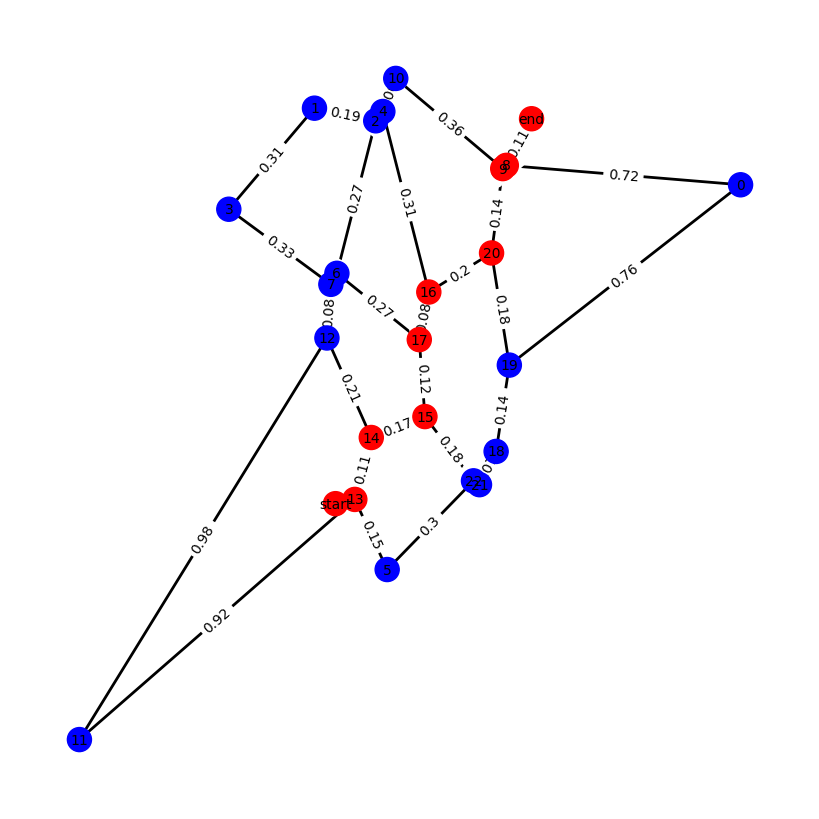

In [14]:
print(G.number_of_nodes())
print(list(G.nodes))
source = 'start'
target = 'end'
print(nx.has_path(G, source, target))
# Calcola il cammino minimo da 'start' a 'end' utilizzando l'algoritmo di Dijkstra
shortest_path = nx.shortest_path(G, source, target)
print(shortest_path)

# Crea una nuova figura per il grafo con il cammino minimo evidenziato
plt.figure(figsize=(8, 8))

node_colors = ['r' if node in shortest_path else 'b' for node in G.nodes()]
labels = nx.get_edge_attributes(G, 'weight')
print(labels)
for key, value in labels.items():
  labels[key] = round(value, 2)
print(labels)
nx.draw(G, pos, with_labels=True, node_size=300, node_color = node_colors, font_size = 10, width = 2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size = 10)

#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()

# Estrazione coordinate del cammino minimo


In [15]:
shortest_path_coordinates = [G.nodes[node]['pos'] for node in shortest_path]
for x,y in shortest_path_coordinates: #OTTENUTI I PUNTI DA FAR SEGUIRE AL ROBOT VIRUTALE
  print(f'Coordinate: ({round(x,2)}, {round(y,2)})')

Coordinate: (0.2, 0.2)
Coordinate: (0.26, 0.21)
Coordinate: (0.31, 0.3)
Coordinate: (0.47, 0.34)
Coordinate: (0.46, 0.46)
Coordinate: (0.49, 0.53)
Coordinate: (0.68, 0.59)
Coordinate: (0.71, 0.72)
Coordinate: (0.72, 0.73)
Coordinate: (0.8, 0.8)
